In [1]:
import seaborn as sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.losses import mean_absolute_percentage_error as mape
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn import svm
from xgboost import XGBRegressor

Reading the Dataset from the Kaggle Database

In [2]:
data=pd.read_csv("Dataset.csv")
data=data.drop('Serial No.',axis=1)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


*PLotting a Scatter plot to understand the relationship between the Variables field and the target variable *

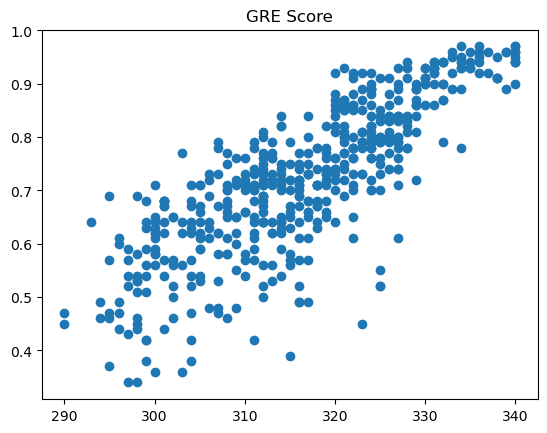

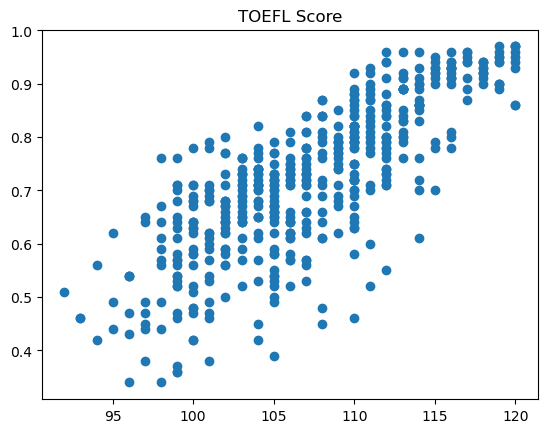

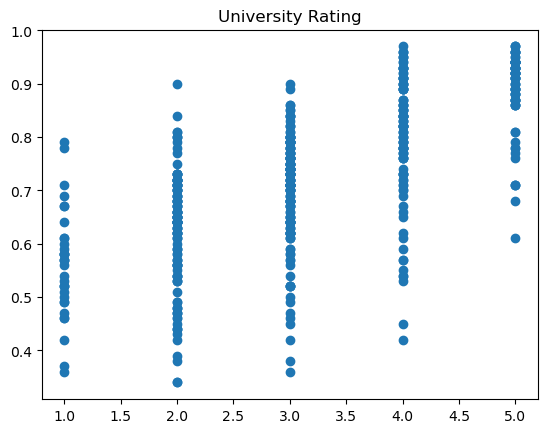

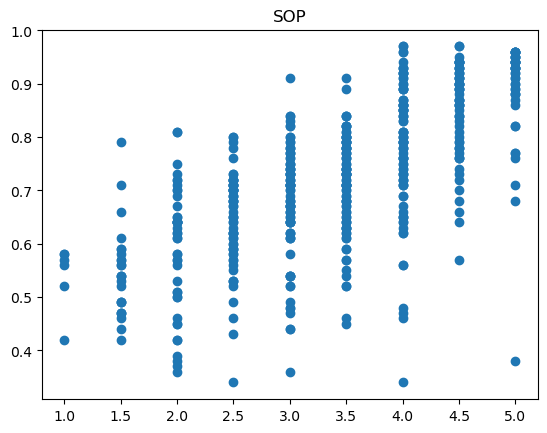

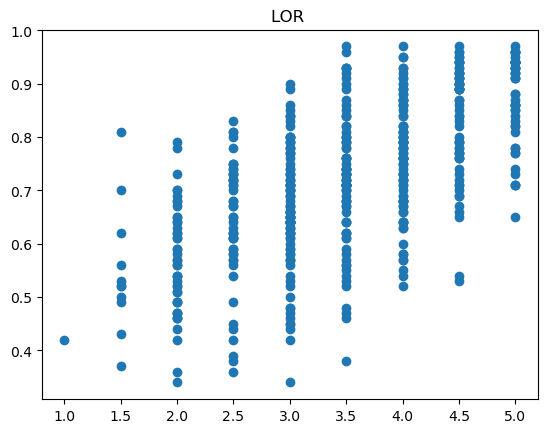

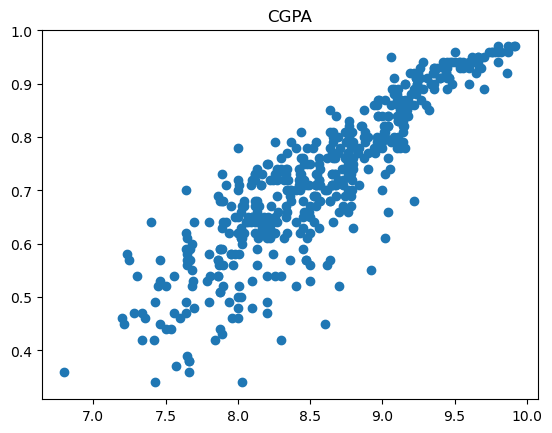

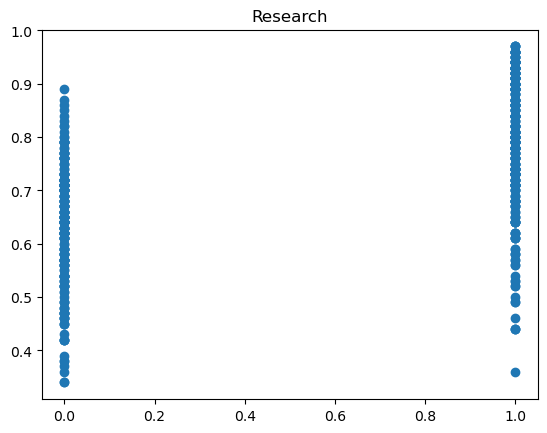

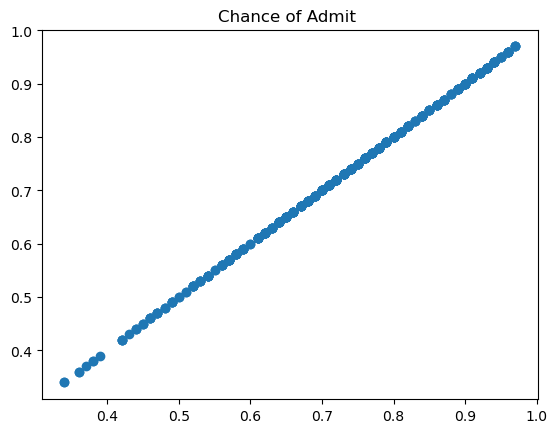

In [3]:
import matplotlib.pyplot as plt
def plot_scatter(Data,list1):
    for ri, rd in Data.iteritems():
        plt.scatter(rd,list1)
        plt.title(ri)
        plt.show()
y=data['Chance of Admit ']
plot_scatter(data,y)

*Plotting a Correlation Matrix to understand the above Graphs much better*

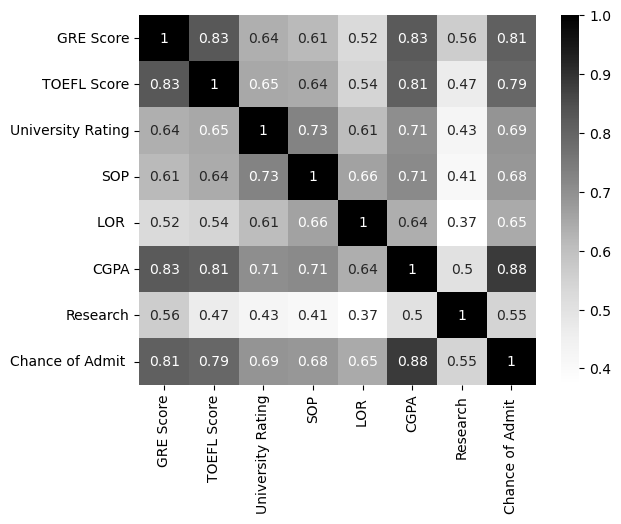

In [4]:
dataplot = sb.heatmap(data.corr(), cmap="Greys", annot=True)
plt.show()

*Plotting a Pairplot to understand the linearlity of Data*

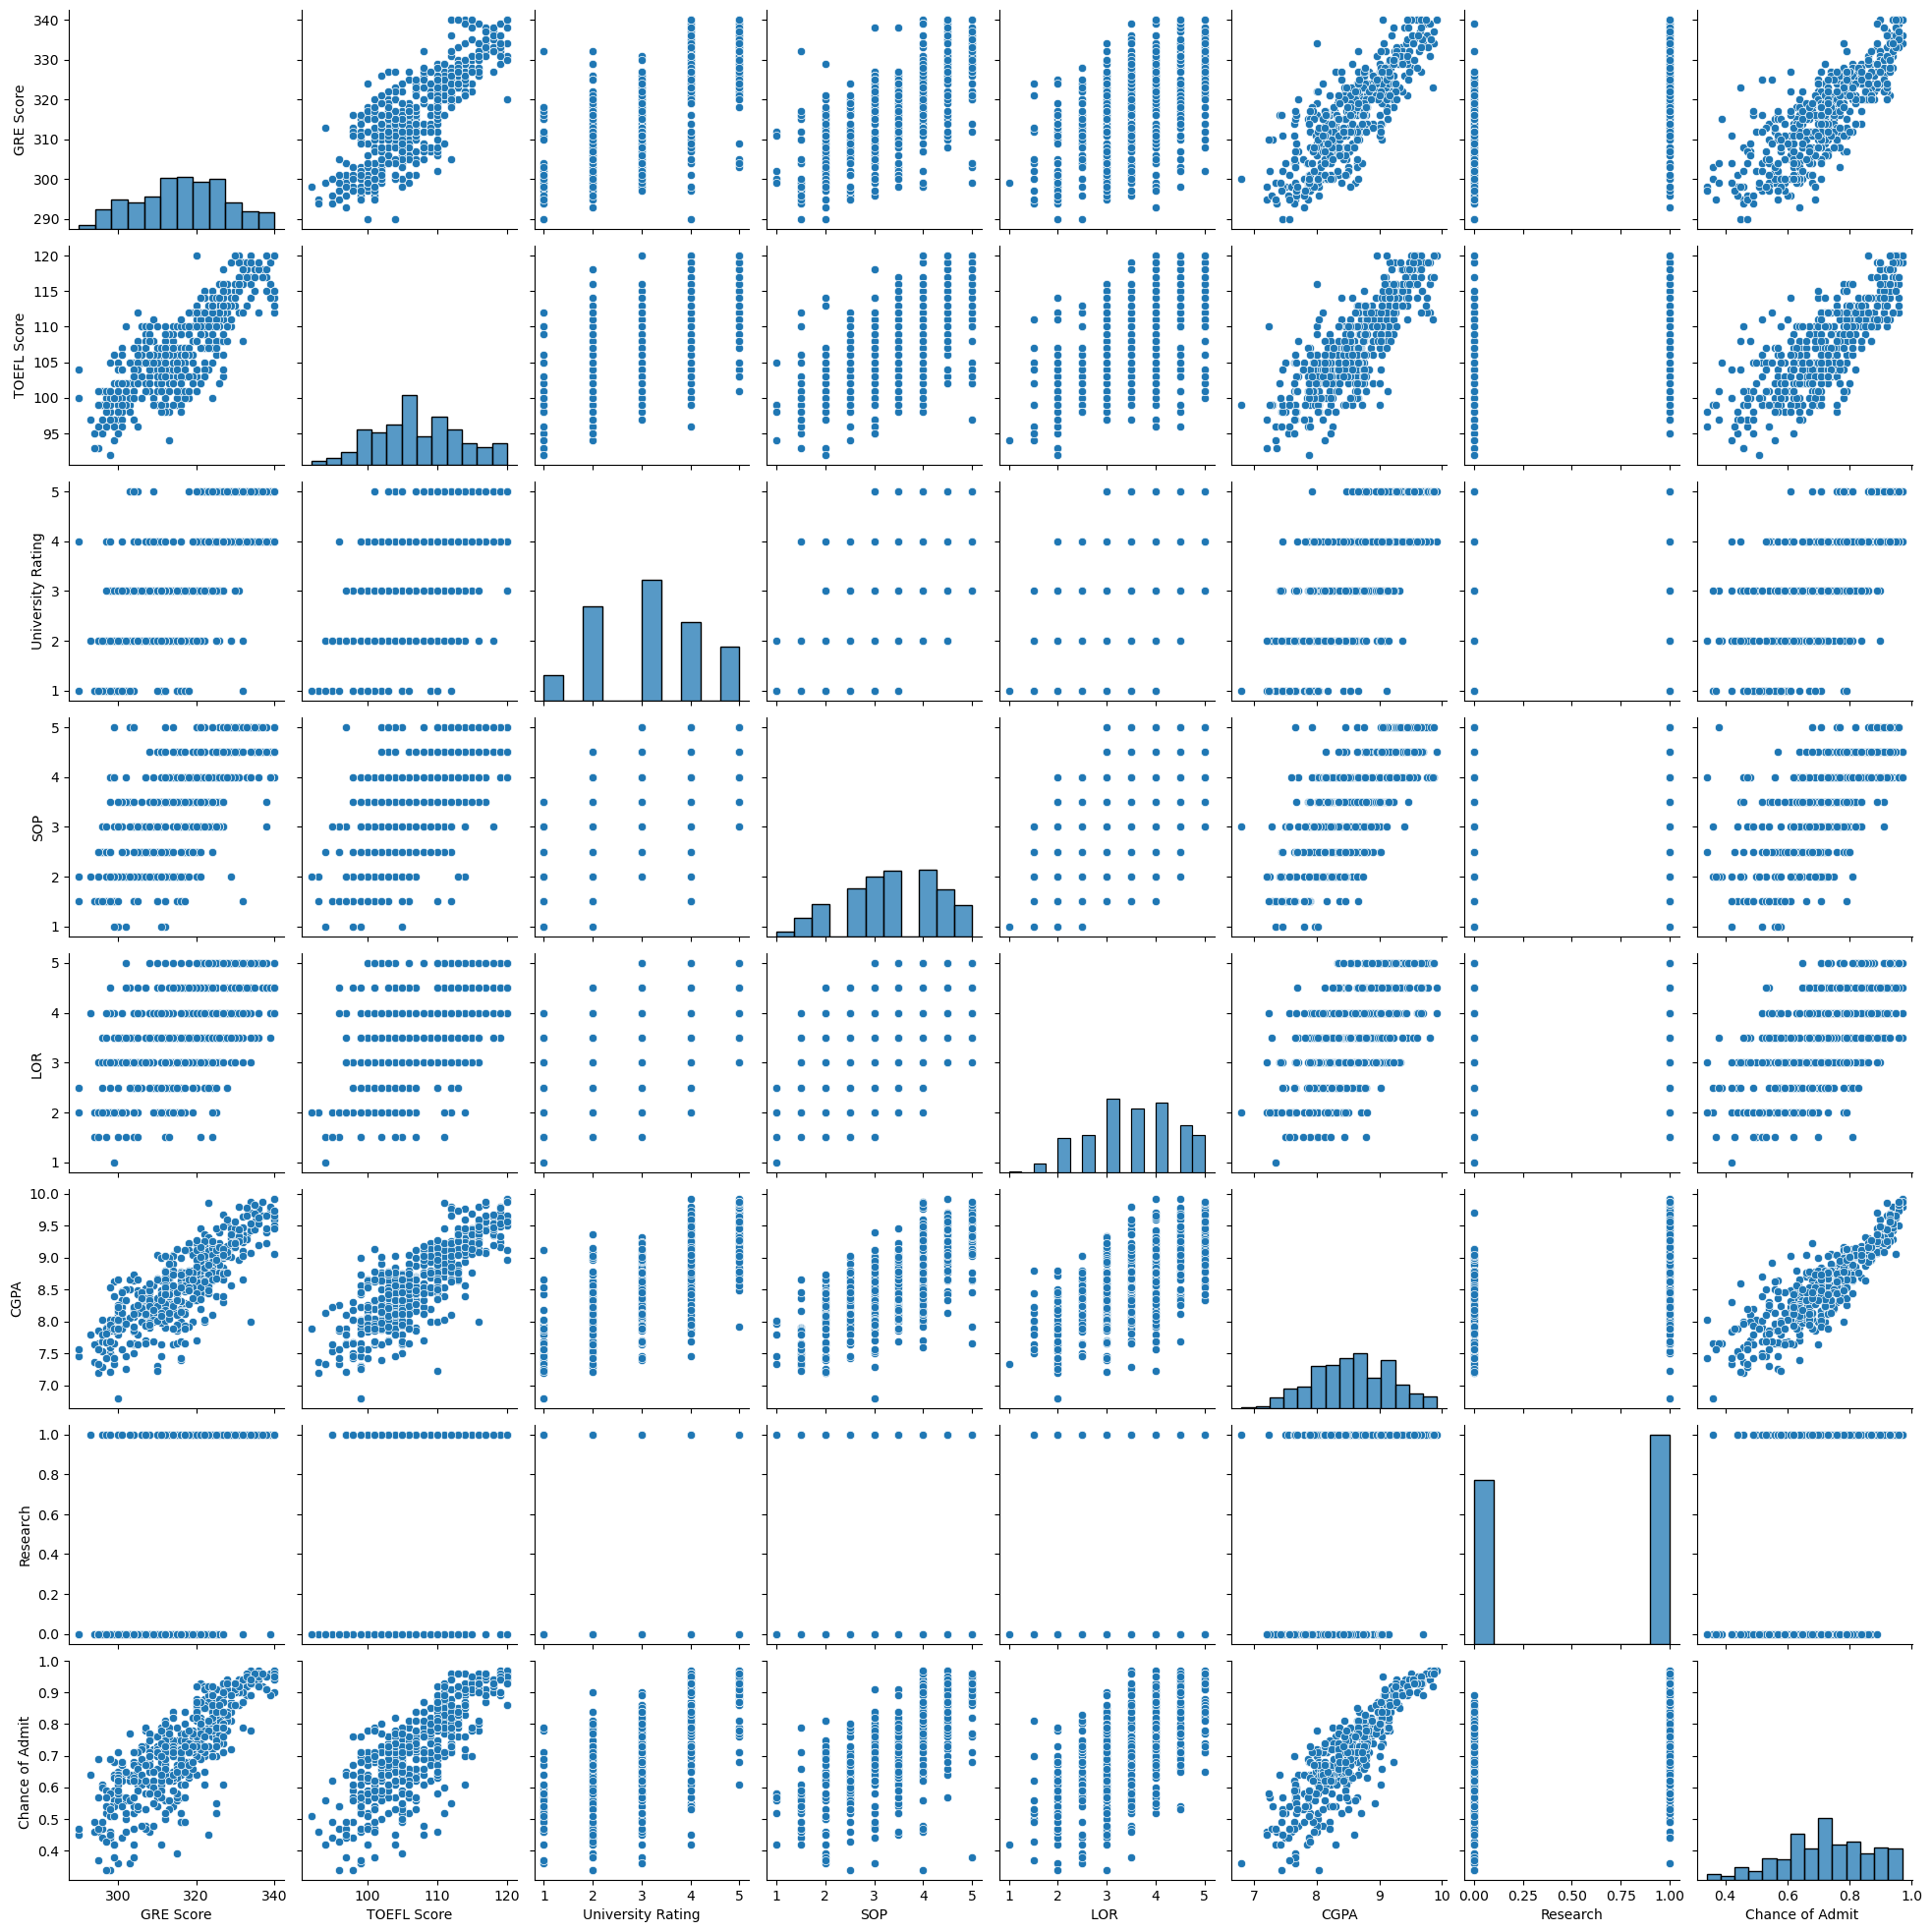

In [9]:
sb.pairplot(data)
plt.show()

 **Performing EDA **

In [10]:
X=data

Getting a list of All Categorical and Numerical Variables to better understand and perform EDA

In [11]:
numerical_list=list(X.select_dtypes(exclude=['object']).columns.tolist())
categorical_list=["SOP","LOR ","Research","University Rating"]
numerical_list.remove("SOP")
numerical_list.remove("LOR ")
numerical_list.remove("Research")
numerical_list.remove("University Rating")
numerical_list.remove("Chance of Admit ")

The List of all Numerical and Categorical Variables: 

In [12]:
print("Categorical Variables: ", categorical_list)
print("Numerical Variables: ", numerical_list)

Categorical Variables:  ['SOP', 'LOR ', 'Research', 'University Rating']
Numerical Variables:  ['GRE Score', 'TOEFL Score', 'CGPA']


One hot Encoding the Categorical Variables 

In [13]:
X_encoded= pd.get_dummies(X, columns = categorical_list)
X_encoded

,GRE Score,TOEFL Score,CGPA,Chance of Admit,SOP_1.0,SOP_1.5,SOP_2.0,SOP_2.5,SOP_3.0,SOP_3.5,...,LOR _4.0,LOR _4.5,LOR _5.0,Research_0,Research_1,University Rating_1,University Rating_2,University Rating_3,University Rating_4,University Rating_5
0,337,118,9.65,0.92,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,324,107,8.87,0.76,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,316,104,8.00,0.72,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,322,110,8.67,0.80,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,314,103,8.21,0.65,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,332,108,9.02,0.87,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
496,337,117,9.87,0.96,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
497,330,120,9.56,0.93,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
498,312,103,8.43,0.73,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


Scaling the Numerical Variables with the help of Standard Scaling

In [14]:
standard_scaler=StandardScaler()
X_encoded[numerical_list]=standard_scaler.fit_transform(X_encoded[numerical_list])

In [15]:
X_encoded

,GRE Score,TOEFL Score,CGPA,Chance of Admit,SOP_1.0,SOP_1.5,SOP_2.0,SOP_2.5,SOP_3.0,SOP_3.5,...,LOR _4.0,LOR _4.5,LOR _5.0,Research_0,Research_1,University Rating_1,University Rating_2,University Rating_3,University Rating_4,University Rating_5
0,1.819238,1.778865,1.776806,0.92,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,0.667148,-0.031601,0.485859,0.76,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,-0.041830,-0.525364,-0.954043,0.72,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,0.489904,0.462163,0.154847,0.80,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
4,-0.219074,-0.689952,-0.606480,0.65,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,0.734118,0.87,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
496,1.819238,1.614278,2.140919,0.96,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
497,1.198882,2.108041,1.627851,0.93,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
498,-0.396319,-0.689952,-0.242367,0.73,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [16]:
y=data['Chance of Admit ']

Splitting Dataset into Train and Test Data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=300)
y_test=list(y_test)

**Performing Various Regressor Machine Learning Algorithms****
1. Random Forest Regressor

In [18]:
model=RandomForestRegressor(n_estimators=800,random_state=100)
model.fit(X_train,y_train)
y_pred_random=list(model.predict(X_test))

In [19]:
print("r2_score: "+str(r2_score(y_test,y_pred_random)))
print("Mean Absolute Percentage Error: ")
mape(y_pred_random,y_test)

r2_score: 0.9999031353999992
Mean Absolute Percentage Error: 


<tf.Tensor: shape=(), dtype=float32, numpy=0.08009182>

2. Linear Regression

In [20]:
linearregression = LinearRegression(normalize=True)
linearregression.fit(X_test, y_test)
y_pred_linearregression = list(linearregression.predict(X_test))

In [21]:
print("r2_score: "+str(r2_score(y_test, y_pred_linearregression)))
print("Mean Absolute Percentage Error: ")
mape(y_pred_linearregression,y_test)

r2_score: 1.0
Mean Absolute Percentage Error: 


<tf.Tensor: shape=(), dtype=float32, numpy=0.0>

3. Decision Tree Regressor

In [22]:
tr=DecisionTreeRegressor()
tr.fit(X_train,y_train)
y_pred_decision=list(tr.predict(X_test))

In [23]:
print("r2_score: "+str(r2_score(y_test,y_pred_decision)))
print("Mean Absolute Percentage Error: ")
mape(y_pred_decision,y_test)

r2_score: 0.9989835718462241
Mean Absolute Percentage Error: 


<tf.Tensor: shape=(), dtype=float32, numpy=0.1980263>

4. Ridge Regression

In [24]:
ridgereg=Ridge(alpha=1,normalize=True)
ridgereg.fit(X_train,y_train)
y_pred_ridge=list(ridgereg.predict(X_test))

In [25]:
print("r2_score: "+str(r2_score(y_test,y_pred_ridge)))
print("Mean Absolute Percentage Error: ")
mape(y_test,y_pred_ridge)

r2_score: 0.851116632935496
Mean Absolute Percentage Error: 


<tf.Tensor: shape=(), dtype=float64, numpy=6.451174111234765>

5. SVM Regression

In [26]:
clf = svm.SVR(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_pred_SVM= list(clf.predict(X_test))

In [27]:
print("r2_score: "+str(r2_score(y_test,y_pred_SVM)))
print("Mean Absolute Percentage Error: ")
mape(y_test,y_pred_ridge)

r2_score: 0.8294527456286362
Mean Absolute Percentage Error: 


<tf.Tensor: shape=(), dtype=float64, numpy=6.451174111234765>

6. XGB Regression

In [28]:
Xgbreg=XGBRegressor(alpha=1.21)
Xgbreg.fit(X_train,y_train)
y_pred=list(Xgbreg.predict(X_test))

In [29]:
print("r2_score: "+str(r2_score(y_test,y_pred)))
print("Mean Absolute Percentage Error: ")
mape(y_test,y_pred)

r2_score: 0.977544333390334
Mean Absolute Percentage Error: 


<tf.Tensor: shape=(), dtype=float32, numpy=1.9289877>

A lot of Different Algorithms have Scored a good Accuracy Score. By far, Linear Regression have outperformed all. 